In [5]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec

In [8]:
df = pd.read_csv('bbc_text_cls.csv')
docs = df['text'].tolist()

In [9]:
model = Top2Vec(docs, workers = 4, embedding_model = 'universal-sentence-encoder')

2023-04-02 15:24:15,247 - top2vec - INFO - Pre-processing documents for training
C:\Users\User\anaconda3\envs\newtensorflow\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-04-02 15:24:16,542 - top2vec - INFO - Downloading universal-sentence-encoder model
2023-04-02 15:27:21,099 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-02 15:27:26,772 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-02 15:27:36,079 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-02 15:27:36,122 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [10]:
model.get_num_topics()

7

In [11]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [12]:
topic_sizes

array([1303,  393,  175,  159,   85,   72,   38], dtype=int64)

In [13]:
topic_nums

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [14]:
model.topic_words[0]

array(['lse', 'tories', 'ukip', 'reuters', 'consumers', 'labour',
       'broadband', 'consumer', 'tory', 'analysts', 'economist',
       'gazprom', 'imf', 'said', 'telecoms', 'effectively', 'allegations',
       'watchdog', 'mps', 'told', 'urged', 'economic', 'exports',
       'backed', 'politicians', 'parliamentary', 'inquiry', 'promised',
       'experts', 'voters', 'insisted', 'affected', 'proved',
       'increasing', 'policies', 'alleged', 'billion', 'term', 'claims',
       'fraud', 'risk', 'argued', 'increased', 'ministers', 'pensions',
       'aims', 'pledged', 'demand', 'concerns', 'conservatives'],
      dtype='<U13')

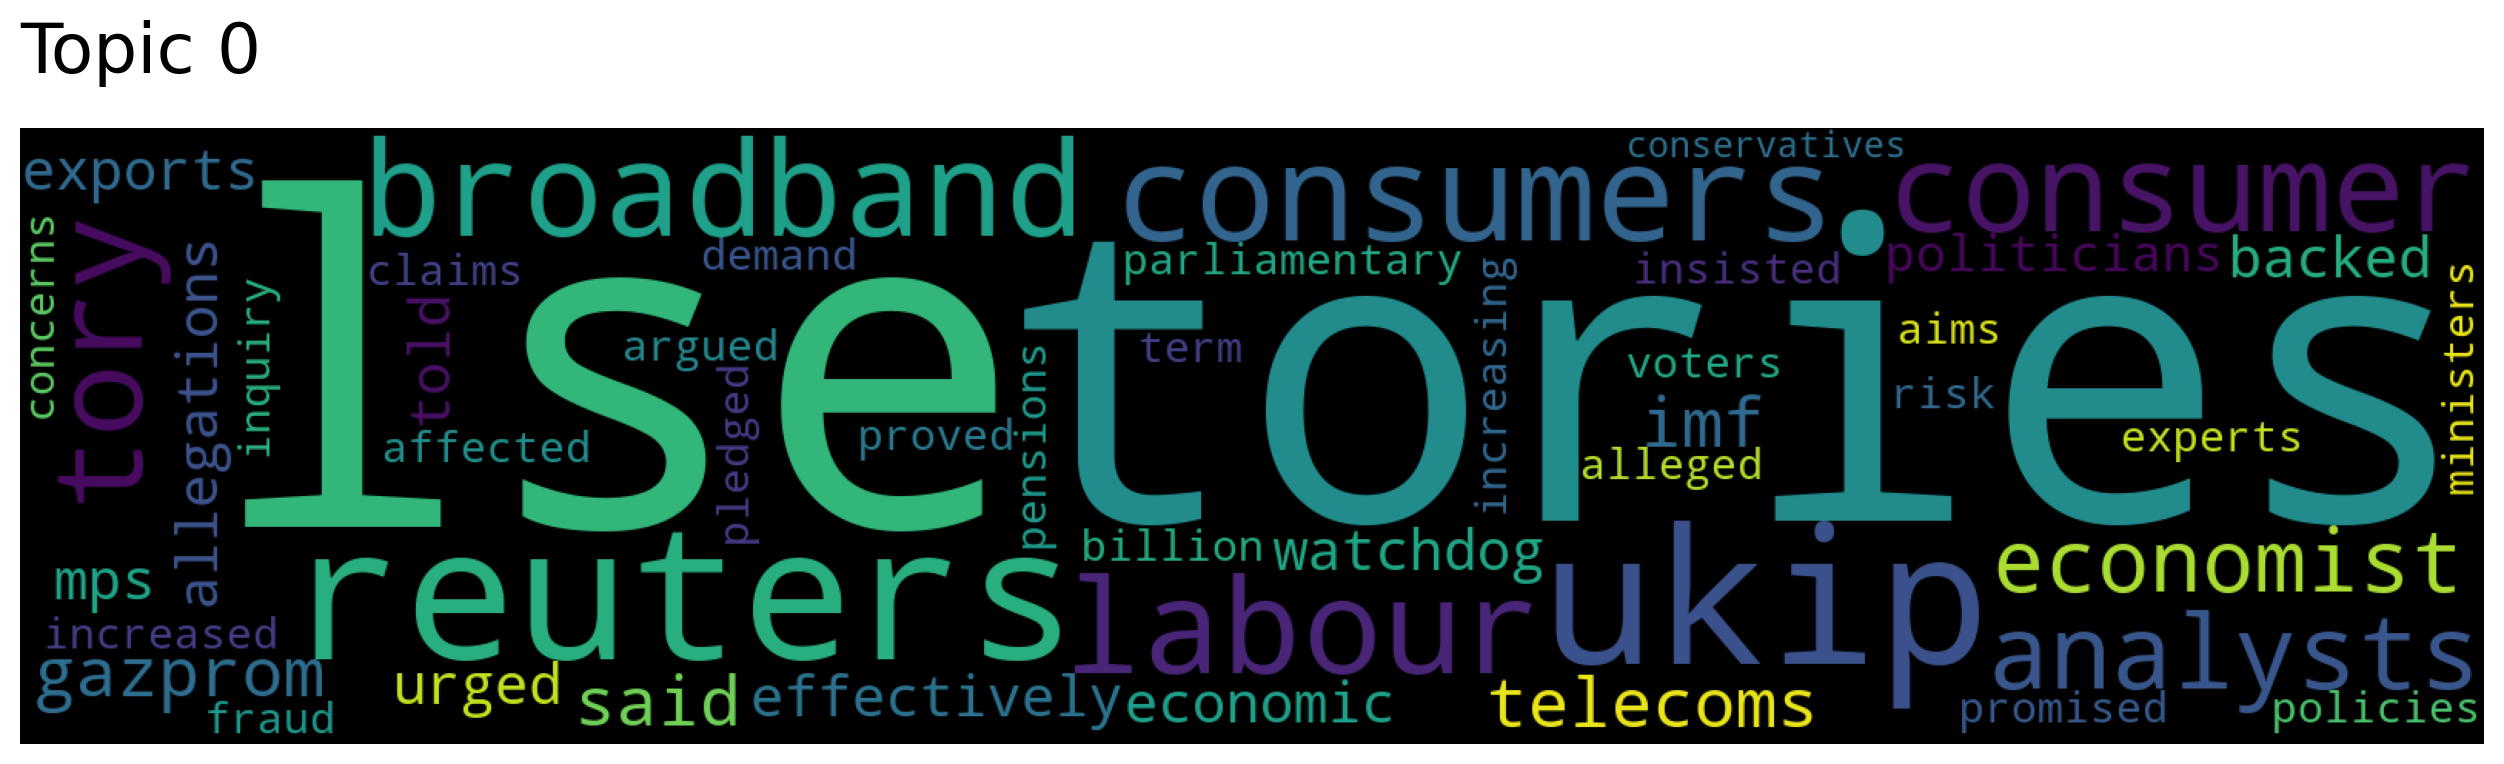

In [17]:
model.generate_topic_wordcloud(0)

In [20]:
model.topic_vectors

array([[-0.0260498 , -0.08048222, -0.03330014, ...,  0.04215282,
        -0.07359779, -0.02550949],
       [-0.03729729, -0.03365256,  0.07299658, ..., -0.0171996 ,
         0.02140955, -0.02841369],
       [ 0.01192007, -0.07082466, -0.06050834, ...,  0.05296226,
        -0.0890315 , -0.08549762],
       ...,
       [-0.03480095, -0.07857205, -0.07001588, ...,  0.05021012,
        -0.08194016, -0.08132472],
       [-0.03488505, -0.07896168, -0.06596953, ...,  0.0372791 ,
        -0.08316243, -0.07610156],
       [-0.05774774, -0.03085838, -0.05708336, ...,  0.05026596,
        -0.07480807, -0.06958399]], dtype=float32)

In [22]:
model.topic_vectors.shape

(7, 512)

In [23]:
# Searching topics by keywords (e.g. semantic search)

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords = ['politics'], num_topics = 3)

In [24]:
topic_words, topic_scores

([array(['lse', 'tories', 'ukip', 'reuters', 'consumers', 'labour',
         'broadband', 'consumer', 'tory', 'analysts', 'economist',
         'gazprom', 'imf', 'said', 'telecoms', 'effectively', 'allegations',
         'watchdog', 'mps', 'told', 'urged', 'economic', 'exports',
         'backed', 'politicians', 'parliamentary', 'inquiry', 'promised',
         'experts', 'voters', 'insisted', 'affected', 'proved',
         'increasing', 'policies', 'alleged', 'billion', 'term', 'claims',
         'fraud', 'risk', 'argued', 'increased', 'ministers', 'pensions',
         'aims', 'pledged', 'demand', 'concerns', 'conservatives'],
        dtype='<U13'),
  array(['doping', 'olympics', 'allegations', 'olympic', 'athletics',
         'athletes', 'iaaf', 'suspended', 'competing', 'alleged', 'accused',
         'tests', 'claims', 'referee', 'medal', 'investigation', 'admitted',
         'trial', 'suspects', 'marathon', 'finals', 'decision', 'athens',
         'allowed', 'ruling', 'compete', 'la

In [25]:
topic_mapping = model.hierarchical_topic_reduction(num_topics = 5)
topic_mapping

[[0], [1], [4, 6, 5], [2], [3]]

In [27]:
model.topic_words_reduced[2]

array(['roddick', 'nadal', 'federer', 'olympics', 'olympic', 'doping',
       'competing', 'medal', 'finals', 'tennis', 'athletics', 'henman',
       'final', 'iaaf', 'tournament', 'athletes', 'hewitt', 'compete',
       'competitive', 'williams', 'championship', 'decision', 'marathon',
       'champions', 'championships', 'injury', 'competition', 'winners',
       'event', 'champion', 'holmes', 'allegations', 'jones', 'rugby',
       'nominated', 'hodgson', 'advantage', 'finish', 'decided',
       'referee', 'premiership', 'winner', 'confident', 'winning',
       'murray', 'welsh', 'greatest', 'win', 'leading', 'technical'],
      dtype='<U13')

In [28]:
index = 1
for words in topic_words:
  print('Topic: ' + str(index))
  print(words)
  index += 1

Topic: 1
['lse' 'tories' 'ukip' 'reuters' 'consumers' 'labour' 'broadband'
 'consumer' 'tory' 'analysts' 'economist' 'gazprom' 'imf' 'said'
 'telecoms' 'effectively' 'allegations' 'watchdog' 'mps' 'told' 'urged'
 'economic' 'exports' 'backed' 'politicians' 'parliamentary' 'inquiry'
 'promised' 'experts' 'voters' 'insisted' 'affected' 'proved' 'increasing'
 'policies' 'alleged' 'billion' 'term' 'claims' 'fraud' 'risk' 'argued'
 'increased' 'ministers' 'pensions' 'aims' 'pledged' 'demand' 'concerns'
 'conservatives']
Topic: 2
['doping' 'olympics' 'allegations' 'olympic' 'athletics' 'athletes' 'iaaf'
 'suspended' 'competing' 'alleged' 'accused' 'tests' 'claims' 'referee'
 'medal' 'investigation' 'admitted' 'trial' 'suspects' 'marathon' 'finals'
 'decision' 'athens' 'allowed' 'ruling' 'compete' 'lawsuit' 'bond'
 'questioned' 'proved' 'officials' 'roddick' 'holmes' 'injury' 'imf'
 'argued' 'decided' 'performed' 'refused' 'ruled' 'sport' 'event' 'test'
 'claim' 'claimed' 'nadal' 'anti' 'char

In [38]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords = ['tennis', 'football'], num_docs = 3)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
  print(f'Document: {doc_id}, Score: {score}')
  print('-----------')
  print(doc)
  print('-----------')
  print()

Document: 1805, Score: 0.2773198885018793
-----------
Connors' rallying cry for British tennis

"Do you have it in your heart? How much guts do you have? How much do you hate to lose?"

These are the questions Jimmy Connors will be asking of Britain's brightest tennis hopes in the months, and possibly years, to come. The American legend swept into London on Thursday to announce a "long-term" relationship with the Lawn Tennis Association after spending three days at the Elite Performance winter camp in La Manga. And the man who epitomised the phrase 'will to win' before Lleyton Hewitt was even born is clear about the qualities he hopes to convey. "You know, everybody hits the ball well and there's a very fine line between number one and number 100," said Connors. "I was that fine line for a long time. But if I can help, I want to be part of teaching kids how to win."

Connors is not the first great name to offer his services to the LTA - his long-time rival John McEnroe has repeatedly d

In [39]:
words, word_scores = model.similar_words(keywords = ['tennis'], keywords_neg = [], num_words = 20)
for word, score in zip(words, word_scores):
  print(f'{word} {score}')

roddick 0.5698546907009161
nadal 0.5612442523996903
federer 0.5485609936868888
sport 0.5234842227593448
sports 0.5229764725736592
football 0.5075669310130853
rugby 0.4851264577547431
athletics 0.4722988503658568
ball 0.4714018367219876
tv 0.41637980777091976
olympic 0.4108788868157024
iaaf 0.40737274197262563
nintendo 0.40664650440788563
athletes 0.4066223762322443
singles 0.4025504287642514
hewitt 0.3971690567329121
league 0.38521137927381643
courts 0.3851602543906443
track 0.3790147176701903
air 0.3750760223762234


In [54]:
model_min_10 = Top2Vec(docs, speed = 'fast-learn', min_count = 10)

2023-04-02 17:16:36,883 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-04-02 17:16:37,924 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-02 17:17:16,245 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-02 17:17:20,924 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-02 17:17:20,968 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [55]:
len(model_min_10.vocab)

6763

In [56]:
model_min_50 = Top2Vec(docs, speed = 'fast-learn', min_count = 50)

2023-04-02 17:17:21,028 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-04-02 17:17:22,072 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-02 17:17:38,987 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-02 17:17:43,886 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-02 17:17:43,928 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [57]:
len(model_min_50.vocab)

2046

In [59]:
model_min_25_ngram = Top2Vec(docs, speed = 'fast-learn', min_count = 25, ngram_vocab = True)
len(model_min_25_ngram.vocab)

2023-04-02 17:18:30,170 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-04-02 17:18:31,208 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-02 17:19:01,072 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-02 17:19:05,796 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-02 17:19:05,837 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


6984

In [63]:
bigrams = []
for word in model_min_25_ngram.vocab:
  if len(word.split()) == 2:
    bigrams.append(word)

In [65]:
bigrams[:10]

['media giant',
 'three months',
 'year earlier',
 'high speed',
 'internet connections',
 'fourth quarter',
 'sales rose',
 'warner bros',
 'on friday',
 'search engine']

In [68]:
# Returns a tensorflow tensor

embedding_vector = model.embed(["This is a fake news article."])
embedding_vector.shape

TensorShape([1, 512])

In [ ]:
topic_words, word_scores, topic_nums = top2vec.get_topics(399)

### Top2Vec

* Adjust min_count parameter. If working with a smaller dataset it makes sense to make it lower, and if the corpora is large, better to make it larger accordingly
* For the embedding model parameter read the possible values in the help(Top2Vec). Important thing to notice that if you train the model on a very niche dataset, it might make sense to use Doc2Vec since it will train the model and its embeddings for you. Otherwise, it might be better to use off-the-shelf models (all other models are off-the-shelf).
* Adjust the speed parameter.
* Adjust custom umap parameters
* Adjust custom hdbscan parameters
* Try switching the ngtram_vocab parameter